# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from datetime import datetime
import seaborn as sns
% matplotlib inline



In [2]:
#Read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## 1. Data Wrangling and Cleaning

### 1.1 Portfolio dataframe

In [3]:
#Check the first entries
print(portfolio.head())

#Check the data types
print(portfolio.dtypes)

                       channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5  
channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object


In [4]:
#Split channels and offer_type into dummy variables
dummies = pd.get_dummies(portfolio['offer_type'])
print(dummies)

#Concat dummy variables to dataframe
portfolio = pd.concat([portfolio,dummies],axis=1)

#Check if everything went well
portfolio.head()

   bogo  discount  informational
0     1         0              0
1     1         0              0
2     0         0              1
3     1         0              0
4     0         1              0
5     0         1              0
6     0         1              0
7     0         0              1
8     1         0              0
9     0         1              0


,channels,difficulty,duration,id,offer_type,reward,bogo,discount,informational
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,0,0
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0


In [5]:
#Create dummy variables out of "channels" column of lists

#Create column for every value in list in the "channels" column and et the value 1 for it.
for i in range(len(portfolio.channels)):
    for j in portfolio.loc[i,"channels"]:
        portfolio.loc[i,j]=1 

#Short check
portfolio.head()

#Fill nan values with 0 
portfolio.email=portfolio.email.fillna(0)
portfolio.mobile=portfolio.mobile.fillna(0)
portfolio.social=portfolio.social.fillna(0)
portfolio.web=portfolio.web.fillna(0)

#Short check again
print(portfolio.head())

#Drop the "channels" column
portfolio = portfolio.drop('channels',axis=1)

                       channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  bogo  discount  \
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10     1         0   
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10     1         0   
2  3f207df678b143eea3cee63160fa8bed  informational       0     0         0   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5     1         0   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5     0         1   

   informational  email  mobile  social  web  
0              0    1.0     1.0     1.0  0.0  
1              0    1.0     1.0     1.0  1.0  
2              1    1.0     1.0     0.0  1.0  


In [6]:
#Rename ID-column into "offer_id"
portfolio = portfolio.rename(columns={"id":"offer_id"})
portfolio.head()

,difficulty,duration,offer_id,offer_type,reward,bogo,discount,informational,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,0,1.0,1.0,1.0,0.0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,0,0,1.0,1.0,1.0,1.0
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,0,1,1.0,1.0,0.0,1.0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,0,1.0,1.0,0.0,1.0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0,1.0,0.0,0.0,1.0


### 1.2 Profile dataframe 

In [7]:
#Check the first entries
profile.head()

#Check the data types
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

In [8]:
#Check for NaN values
print(profile.isna().sum())

# Check rows with age of 118
print(profile[profile['age']==118])

#Check for number
print(profile[profile['age']==118].count())

#Drop rows with age 118
profile = profile.drop(profile[profile['age']==118].index,axis=0)

#Check for NaN values
print(profile.isna().sum())

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64
       age  became_member_on gender                                id  income
0      118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783     NaN
2      118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5     NaN
4      118          20170804   None  a03223e636434f42ac4c3df47e8bac43     NaN
6      118          20170925   None  8ec6ce2a7e7949b1bf142def7d0e0586     NaN
7      118          20171002   None  68617ca6246f4fbc85e91a2a49552598     NaN
9      118          20161122   None  8974fc5686fe429db53ddde067b88302     NaN
10     118          20170824   None  c4863c7985cf408faee930f111475da3     NaN
11     118          20150919   None  148adfcaa27d485b82f323aaaad036bd     NaN
17     118          20170801   None  744d603ef08c4f33af5a61c8c7628d1c     NaN
23     118          20170907   None  2b826eba31074a059d63b0ae8f50b7d5     NaN
26  

In [9]:
#Change format of the date
profile.became_member_on=profile.became_member_on.astype(str)
profile.loc[:,'became_member_on'] = profile.loc[:,'became_member_on'].str[:4]+'-'+profile.loc[:,'became_member_on'].str[4:6]+'-'+profile.loc[:,'became_member_on'].str[6:]
profile.head()

,age,became_member_on,gender,id,income
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


In [10]:
#Create year-month column out of "became_member_on" date
profile["became_member_on"] = pd.to_datetime(profile["became_member_on"])
profile["membership_year"] = profile['became_member_on'].dt.strftime("%Y")
profile["membership_year_month"] = profile['became_member_on'].dt.strftime("%Y-%m")

In [11]:
#Rename ID-column in "customer_id"
profile = profile.rename(columns={"id":"customer_id"})
profile.head()

,age,became_member_on,gender,customer_id,income,membership_year,membership_year_month
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,2017-07
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,2017-05
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,2018-04
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2018-02
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,2017-11


### 1.3 Transcript dataframe

In [12]:
#Check the first entries
print(transcript.head())

#Check the data types
print(transcript.dtypes)

            event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}  
event     object
person    object
time       int64
value     object
dtype: object


In [13]:
#Create dummy variables out of "event" column
dummies = pd.get_dummies(transcript.event)
print(dummies)

#Concat the dummies with the dataframe
transcript = pd.concat([transcript,dummies],axis=1)
transcript.head()

        offer completed  offer received  offer viewed  transaction
0                     0               1             0            0
1                     0               1             0            0
2                     0               1             0            0
3                     0               1             0            0
4                     0               1             0            0
5                     0               1             0            0
6                     0               1             0            0
7                     0               1             0            0
8                     0               1             0            0
9                     0               1             0            0
10                    0               1             0            0
11                    0               1             0            0
12                    0               1             0            0
13                    0               1             0         

,event,person,time,value,offer completed,offer received,offer viewed,transaction
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,1,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,1,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,1,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,1,0,0


In [14]:
# Create a new offer_id column and a new amount column with the keys of the "value" column and fill in the values of the keys
# The reward key can be ignored because it is contained in the portfolio dataframe
for i in range(len(transcript['value'])):
    #print(b.loc[i,"value"].keys())
    if (list(transcript.loc[i,'value'].keys())[0] == 'offer_id') | (list(transcript.loc[i,'value'].keys())[0] == 'offer id'):
        transcript.loc[i,"offer_id"]= list(transcript.loc[i,'value'].values())[0]
        #print("offer")
    elif list(transcript.loc[i,'value'].keys())[0] == 'amount':
        transcript.loc[i,"amount"]= list(transcript.loc[i,'value'].values())[0]

#Drop the original value-column
transcript = transcript.drop(["value"],axis=1)
                                      
#Check the changes
transcript.head()

KeyboardInterrupt: 

In [ ]:
#Rename ID-column to "customer_id"
transcript = transcript.rename(columns={"person":"customer_id"})
transcript.head()

### 1.4 Merge everything to start the analysis

In [ ]:
# Merge the three dataframes 
df = profile.merge(transcript,how='left',on='customer_id')
df = df.merge(portfolio,how='left',on='offer_id')
print(df.head())

In [ ]:
# Save as pickle to save time
df.to_pickle("data/merged_df.pkl")
portfolio.to_pickle("data/portfolio.pkl")
profile.to_pickle("data/profile.pkl")
transcript.to_pickle("data/transcript.pkl")

# Start from here with pickle

In [37]:
# Import libraries to start from here
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import pickle
import os
from datetime import datetime
import seaborn as sns
% matplotlib inline



In [38]:
# Read pickle
df = pd.read_pickle("data/merged_df.pkl")
portfolio = pd.read_pickle("data/portfolio.pkl")
profile = pd.read_pickle("data/profile.pkl")
transcript = pd.read_pickle("data/transcript.pkl")

# Exploratory Analysis

## Portfolio Data

This data consists of the definition of the offers, like the difficulty or the reward for completing them.  

In [39]:
portfolio.head()

,difficulty,duration,offer_id,offer_type,reward,bogo,discount,informational,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,0,1.0,1.0,1.0,0.0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,0,0,1.0,1.0,1.0,1.0
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,0,1,1.0,1.0,0.0,1.0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,0,1.0,1.0,0.0,1.0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0,1.0,0.0,0.0,1.0


#### Q: How many different offers exist and what are the proportions of the offer types?

In [40]:
portfolio_n = portfolio.shape[0]
print(portfolio_n)
print(portfolio[portfolio['offer_type']=='bogo'].count()['offer_type']/portfolio_n*100)
print(portfolio[portfolio['offer_type']=='discount'].count()['offer_type']/portfolio_n*100)
print(portfolio[portfolio['offer_type']=='informational'].count()['offer_type']/portfolio_n*100)
#portfolio[portfolio['offer_type'] =='bogo'].count()

10
40.0
40.0
20.0


- There are 10 different offers
- The proportion of a bogo and a discount offer is the same with 40% each. The proportion of an informational offer is 20%.

##  Profile Data

The profile data consists of demographic data about the customers.

In [41]:
profile.head()

,age,became_member_on,gender,customer_id,income,membership_year,membership_year_month
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,2017-07
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,2017-05
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,2018-04
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2018-02
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,2017-11


### Univariate Analysis

#### Q: How is the distribution of the age of participants of the starbucks application

The mean is: 54.3935244519
The mode is: 0    58.0
dtype: float64
The median: 55.0


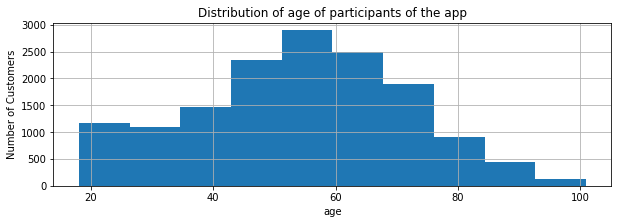

In [42]:
# Set up a figure
fig = plt.figure(figsize=(10,3))

# Set up subplots
(profile['age'].hist())
plt.title('Distribution of age of participants of the app')
plt.ylabel('Number of Customers')
plt.xlabel("age")

print("The mean is: "+str(profile["age"].astype(float).mean()))
print("The mode is: "+str(profile["age"].astype(float).mode()))
print("The median: "+str(profile["age"].astype(float).median()))

#os.mkdir("images")
plt.savefig('images/age_distribution.png')

- We can see, that the most customers are between 50 and 70 years old, which is older than expected.
- The mean of the age lies at 54 years
- The most present age is 58 years
- 50 % of the customers are younger than 55 years.

#### Q: How is the distribution of the income of participants of the starbucks application

The mean is: 65404.9915683
The mode is: 0    73000.0
dtype: float64
The median: 64000.0


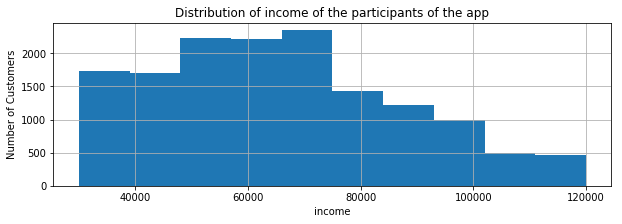

In [43]:
# Set up a figure
fig = plt.figure(figsize=(10,3))

# Set up subplots
(profile['income'].hist())
plt.title('Distribution of income of the participants of the app')
plt.ylabel('Number of Customers')
plt.xlabel("income")

print("The mean is: "+str(profile["income"].astype(float).mean()))
print("The mode is: "+str(profile["income"].astype(float).mode()))
print("The median: "+str(profile["income"].astype(float).median()))

plt.savefig('images/age_distribution.png')

- We can see, that the most customers have an income of about 70,000 USD and the number of customers decreases with increasing income.
- The mean of the income is about 65,000 USD. 
- The most present income is 73,000 USD.
- 50 % of the customers have an income smaller than 64,000 USD.

#### Q: How is the distribution of the gender of participants of the starbucks application

The Male customers make up 57.23 % of the customers
The Female customers make up 41.34 % of the customers
The Other customers make up 1.43 % of the customers


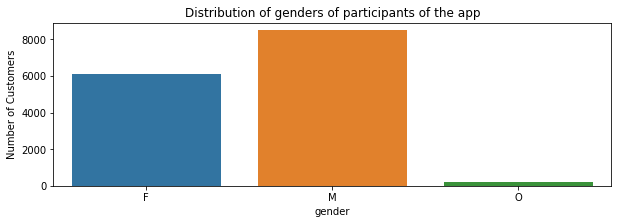

In [44]:
# Set up a figure
fig = plt.figure(figsize=(10,3))

# Set up subplots
#(profile['gender'].value_counts()).sort_values(ascending=False).plot.bar(color='blue')
sns.countplot(x='gender',data=profile)
plt.title('Distribution of genders of participants of the app')
plt.ylabel('Number of Customers')

profile_n = profile.shape[0]
print("The Male customers make up "+str(round(profile[profile['gender']=='M'].count()['gender']/profile_n*100,2))+" % of the customers")
print("The Female customers make up "+str(round(profile[profile['gender']=='F'].count()['gender']/profile_n*100,2))+" % of the customers")
print("The Other customers make up "+str(round(profile[profile['gender']=='O'].count()['gender']/profile_n*100,2))+" % of the customers")

- The proportion of male participants is 15 percent points higher than the proportion of female participants.
- Other customers make up about 1.5 % of the total customers.

#### Q: What is the distribution of the membership

Proportion of memberships in year 2013 :1.85 %
Proportion of memberships in year 2014 :4.47 %
Proportion of memberships in year 2015 :10.77 %
Proportion of memberships in year 2016 :20.4 %
Proportion of memberships in year 2018 :24.75 %
Proportion of memberships in year 2017 :37.77 %


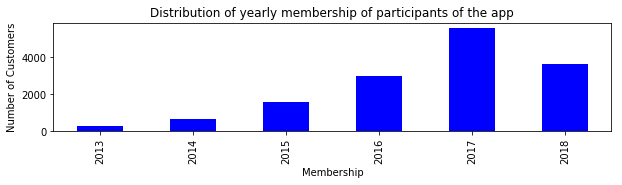

In [45]:
#Get years in right order 
u, count = np.unique(profile["membership_year"], return_counts=True)
count_sort_ind = np.argsort(count)
years = u[count_sort_ind]

# Set up a figure
fig = plt.figure(figsize=(10,2))

# Set up subplots
(profile['membership_year'].value_counts().sort_index()).plot.bar(color='blue')
plt.title('Distribution of yearly membership of participants of the app')
plt.ylabel('Number of Customers')
plt.xlabel("Membership")

for i in years:
    print("Proportion of memberships in year "+str(i)+" :"+str(round(profile[profile["membership_year"]==str(i)].count()['membership_year']/profile_n*100,2))+" %")
    

- A clear increase in members is seen by the distribution over the years starting from 2013 to 2018 
- From 2013 to 2017 there was a alomost two fold increase every year.
- From 2017 to 2018 there was a decrease of about 50%

### Multivariate Analysis

#### Q: How is the distribution of the income between the genders

Text(0.5,1,'Income distribution between genders')

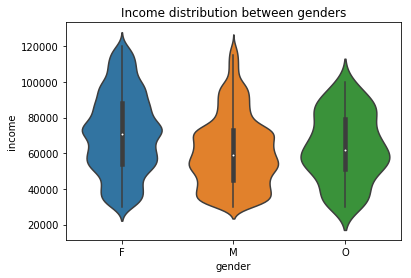

In [46]:
sns.violinplot(x="gender", y="income", data=profile).set_title("Income distribution between genders")


- The highest amount of females have an income of about 80,000 USD but the amount of females with low and high income is balanced well.
- Male members peak at 60,000 USD and the amount of males decreases after 70,000 USD and decreases further with higher income.
- Members who chose the "Other" gender have the highest amount at also about 60,000 USD but maintain a better balance between low and high income.

#### Q: How is the distribution of the age between the genders

Text(0.5,1,'Age distribution between genders')

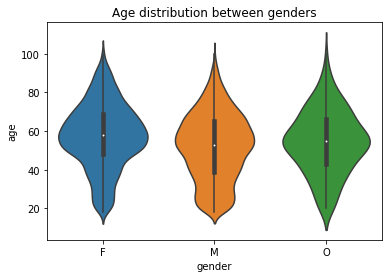

In [47]:
sns.violinplot(x="gender", y="age", data=profile).set_title("Age distribution between genders")

- Female members peak between the age of 50 and 70. 
- Males also peak between the same age but more young members (age of 20 to 40) are males. 
- Other members have the same distribution of age like the female members.


#### Q: Was there a year of membership, which was dominantly used by a specific gender?

Text(0.5,1,'Membership distribution between genders')

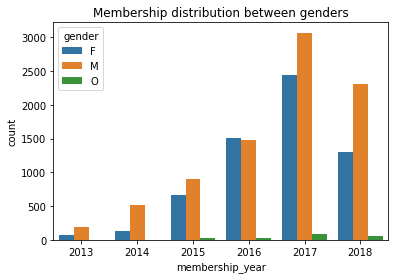

In [48]:
sns.countplot(x="membership_year", hue="gender", data=profile).set_title("Membership distribution between genders")

- From 2013 to 2015 male members started to use the app more.
- In 2016 the number of females becoming members exceeded the number of male becoming members for the first time.
- In 2017 this trend changed again. 
- In 2018 the number of new female members decreased to the same point in year 2016, whereas the new male members maintained more. 

## Transcript data

### Univariate Analysis

In [49]:
transcript.head()

,event,customer_id,time,offer completed,offer received,offer viewed,transaction,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


#### Q: How is the distribution of the different events?

Proportion of the transaction event: 45.33 %
Proportion of the offer received event: 24.88 %
Proportion of the offer viewed event: 18.83 %
Proportion of the offer completed event: 10.95 %


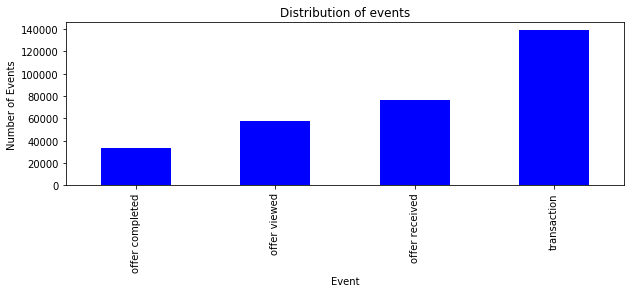

In [50]:
# Set up a figure
fig = plt.figure(figsize=(10,3))

# Set up subplots
transcript['event'].value_counts().sort_values().plot.bar(color='blue')
plt.title('Distribution of events')
plt.ylabel('Number of Events')
plt.xlabel("Event")


transcript_n = transcript.shape[0]
print("Proportion of the transaction event: "+str(round(transcript[transcript['event']=='transaction'].count()['event']/transcript_n*100,2))+" %")
print("Proportion of the offer received event: "+str(round(transcript[transcript['event']=='offer received'].count()['event']/transcript_n*100,2))+" %")
print("Proportion of the offer viewed event: "+str(round(transcript[transcript['event']=='offer viewed'].count()['event']/transcript_n*100,2))+" %")
print("Proportion of the offer completed event: "+str(round(transcript[transcript['event']=='offer completed'].count()['event']/transcript_n*100,2))+" %")


- The most present present event is the transaction, whereas offer completed is the least present one. 
- The transaction event has a proportion of about half of the events.
- Almost a quarter of the events are received offers.
- Only 19 % of the events are viewed.
- The lowest proportion of events is the offer completed event.

To make assumptions about the link between certain demopgraphics and offer types, I need the assigned values of the demographic data to the offer types. Due to the lack of assignment of the transaction event, I split the merged dataframe into two datasets. One with the transaction event and one without. Furthermore I have to cluster the age and income to find ranges for the best offers. 

### Offer Data

In [51]:
offer_df = df[df["event"] != "transaction"]
transaction_df = df[df["event"] == "transaction"]
offer_df.head()

,age,became_member_on,gender,customer_id,income,membership_year,membership_year_month,event,time,offer completed,...,duration,offer_type,reward,bogo,discount,informational,email,mobile,social,web
2,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,2017-07,offer received,408,0,...,7.0,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,2017-07,offer received,504,0,...,4.0,informational,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
5,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,2017-07,offer completed,528,1,...,7.0,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
6,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,2017-05,offer received,0,0,...,7.0,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
7,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,2017-05,offer viewed,6,0,...,7.0,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [52]:
income_cluster_fun = [lambda x: "0 - 40k" if x <= 40000 else ("40k - 60k" if x > 40000 and x <=60000 else ("60k - 80k" if x > 60000 and x <=80000 else("80k - 100k" if x > 80000 and x <=100000 else("100k - 120k" if x > 100000 and x <=120000 else("120k - inf" if x > 120000 else("Test"))))))]
age_cluster_fun = [lambda x: "18 - 30" if x <= 30 else ("30 - 40" if x > 30 and x <= 40 else ("40 - 50" if x > 40 and x <=50 else("50 - 60" if x > 50 and x <=60 else("60 - 70" if x > 60 and x <=70 else("70 - 80" if x > 70 and x <= 80 else("80 - 90" if x > 80 and x <= 90 else("90+" if x > 90 else("Test"))))))))]

offer_df['income_cluster'] = offer_df['income'].apply(income_cluster_fun)
offer_df['age_cluster'] = offer_df['age'].apply(age_cluster_fun)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [53]:
offer_df.head()

,age,became_member_on,gender,customer_id,income,membership_year,membership_year_month,event,time,offer completed,...,reward,bogo,discount,informational,email,mobile,social,web,income_cluster,age_cluster
2,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,2017-07,offer received,408,0,...,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,100k - 120k,50 - 60
3,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,2017-07,offer received,504,0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,100k - 120k,50 - 60
5,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,2017-07,offer completed,528,1,...,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,100k - 120k,50 - 60
6,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,2017-05,offer received,0,0,...,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,80k - 100k,70 - 80
7,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,2017-05,offer viewed,6,0,...,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,80k - 100k,70 - 80


#### Q: What are the general satistics of customers? 

In [54]:
# Build customer statistics 
def build_customer_statistics(df,sum_num_columns,non_sum_num_columns):
    """
    Builds customer statistics for analysis
    
    INPUT:
    df - dataframe
    sum_num_columns - list of columns with values that should be summed up (amount, number of viewed offers, etc.)
    non_sum_num_columns - list of columns with values that should not be summed up (Age, Gender, etc.)
    
    OUTPUT:
    custom_df - dataframe with customer metrics/statistics
    
    """
    sum_num_data = df.groupby('customer_id').sum()[sum_num_columns]
    non_sum_num_data = df.groupby("customer_id").max()[non_sum_num_columns]
    custom_df = sum_num_data.merge(non_sum_num_data,on='customer_id')
    
    return custom_df


sum_num_columns = ['offer received','offer viewed','offer completed','difficulty','amount','reward','bogo','discount','informational']
non_sum_num_columns = ['age','gender','income']

custom_df =  build_customer_statistics(offer_df,sum_num_columns,non_sum_num_columns)

def generate_general_metrics(custom_df):
    """
    Generates general metrics of df
    
    INPUT:
    - custom_df - Customer dataframe generated by function "build_customer_statistics"
    
    OUTPUT:
    - prints out several statistics
    """
    # Generate general metrics over all offers
    # Number of customers
    n_customers = custom_df.shape[0]
    
    # Number of received offers
    n_offers = np.sum(custom_df['offer received'])

    # View rate (Rate, that a customer viewed an offer)
    view_rate = np.sum(custom_df['offer viewed'])/np.sum(custom_df['offer received'])
    
    # Completion rate (Rate, that a customer completed an offer)
    comp_rate = np.sum(custom_df['offer completed'])/np.sum(custom_df['offer received'])
    
    # View-Completion rate (Rate, that a customer completed an offer after seeing it).
    view_comp_rate = np.sum(custom_df['offer completed'])/np.sum(custom_df['offer viewed'])
    
    print("The number of customers in this dataframe: "+str(n_customers))
    print("The number of received offers: "+str(n_offers))
    print("The rate of viewed offers: "+str(view_rate*100)+" %")
    print("The rate of completed offers in the dataset: "+str(comp_rate*100)+" %")
    print("The rate of completed offers of viewed offers: "+str(view_comp_rate*100)+" %")
    
generate_general_metrics(custom_df)

The number of customers in this dataframe: 14820
The number of received offers: 66501
The rate of viewed offers: 74.9763161456 %
The rate of completed offers in the dataset: 48.7872362822 %
The rate of completed offers of viewed offers: 65.0701965503 %


- We can see, that 75 % offers are viewed afer received.
- 65 % of the offers are completed after being viewed.
- Only half of the offers are completed in total.

#### Q: How does the membership affect the completion of an offer?

Text(0.5,1,'Distribution of events between membership years')

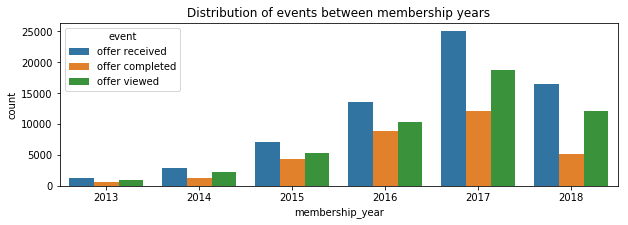

In [55]:
# Set up a figure
fig = plt.figure(figsize=(10,3))

sns.countplot(x="membership_year", hue="event", data=offer_df).set_title("Distribution of events between membership years")

- Members of the years 2013 to 2016 viewed more of the offers received and thus completed more of them. The newer members got more offers but viewed them less and completed them less

#### Q: How does the gender influence the completion of an offer?

Text(0.5,1,'Distribution of events between genders')

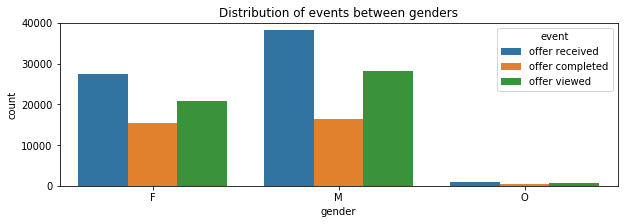

In [56]:
#Set up a figure
fig = plt.figure(figsize=(10,3))
sns.countplot(x="gender", hue="event", data=offer_df).set_title("Distribution of events between genders")

- We can see, that the total amount of completed offers is higher for males.
- But relatively the amount of received and viewed amount are the same mor male and female members.
- The proportion of completed offers is higher for the female members.

#### Q: How does the age influence the completion of an offer?

Text(0.5,1,'Distribution of events in different age groups')

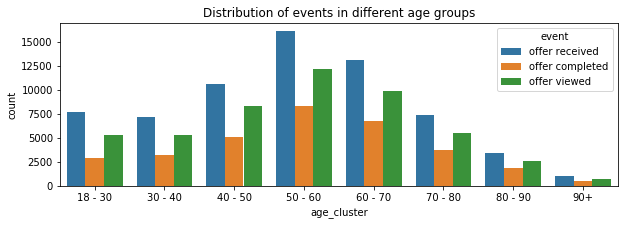

In [57]:
#Set up a figure
fig = plt.figure(figsize=(10,3))
sns.countplot(order=sorted(offer_df['age_cluster'].unique()),x="age_cluster", hue="event", data=offer_df).set_title("Distribution of events in different age groups")

- People between 40 and 60 received the most offers.
- People older than the age of 60 complete offers best.
- The youngest group completed offers the worst.

#### Q: How does the income influence the completion of an offer?

Text(0.5,1,'Distribution of events in different income groups')

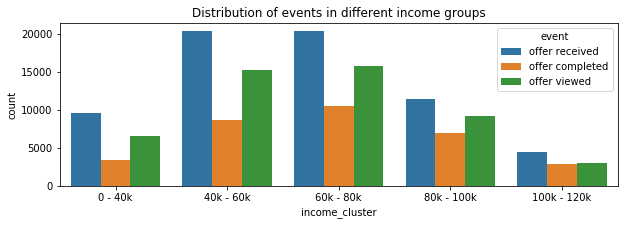

In [58]:
#Set up a figure
fig = plt.figure(figsize=(10,3))
sns.countplot(order=['0 - 40k','40k - 60k','60k - 80k','80k - 100k','100k - 120k'],x="income_cluster", hue="event", data=offer_df).set_title("Distribution of events in different income groups")

- Low income groups complete less offers than higher income groups.
- The best completion rate is in income ranges from 80,000 to 120,000 USD

Text(0.5,1,'Distribution of events in different age groups')

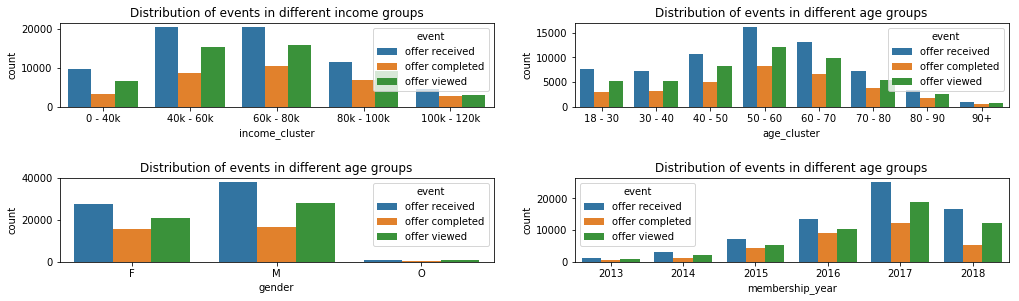

In [59]:
# Summarizing all Plots
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(15,5))
fig.tight_layout(pad=5.0)
sns.countplot(ax=ax1,order=['0 - 40k','40k - 60k','60k - 80k','80k - 100k','100k - 120k'],x="income_cluster", hue="event", data=offer_df).set_title("Distribution of events in different income groups")
sns.countplot(ax=ax2,order=sorted(offer_df['age_cluster'].unique()),x="age_cluster", hue="event", data=offer_df).set_title("Distribution of events in different age groups")
sns.countplot(ax=ax3,x="gender", hue="event", data=offer_df).set_title("Distribution of events in different age groups")
sns.countplot(ax=ax4,x="membership_year", hue="event", data=offer_df).set_title("Distribution of events in different age groups")

#### Q: What are the statistics of an completed offer?

In [60]:
completed_df = offer_df[offer_df['offer completed']==1]
print("Average age: "+str(completed_df['age'].mean()))
print("Average income: "+str(completed_df['income'].mean()))
print("Most present membership year: "+str(completed_df['membership_year'].mode()[0]))
print("Most present offer type: "+str(completed_df['offer_type'].mode()[0]))
print("Most present gender: "+str(completed_df['gender'].mode()[0]))

Average age: 55.8266243373
Average income: 69430.8038466
Most present membership year: 2017
Most present offer type: discount
Most present gender: M


#### Q: Is there an influence from the income on the completed offer types 

Text(0.5,1,'Distribution of offer types in different income groups')

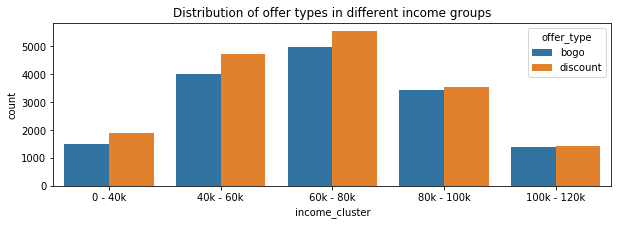

In [61]:
#Set up a figure
fig = plt.figure(figsize=(10,3))
sns.countplot(order=['0 - 40k','40k - 60k','60k - 80k','80k - 100k','100k - 120k'] ,x="income_cluster", hue="offer_type", data=completed_df).set_title("Distribution of offer types in different income groups")

- Almost all income groups completed the bogo and discount offer type similar.
- The income clusters 40,000 to 80,000 prefered the discount more than the bogo.

#### Q: Is there an influence from the age on the completed offer types 

Text(0.5,1,'Distribution of offer types in different age groups')

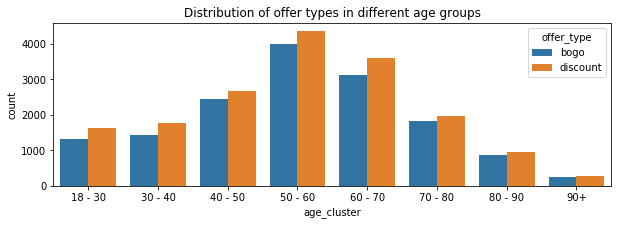

In [62]:
#Set up a figure
fig = plt.figure(figsize=(10,3))
sns.countplot(order = sorted(offer_df['age_cluster'].unique()),x="age_cluster", hue="offer_type", data=completed_df).set_title("Distribution of offer types in different age groups")

- All age groups prefered the discount offer type over the bogo offer type.

#### Q: Is there an specific offer type for a gender?

Text(0.5,1,'Distribution of offer types in different gender groups')

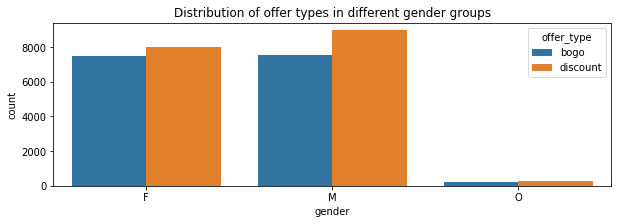

In [63]:
#Set up a figure
fig = plt.figure(figsize=(10,3))
sns.countplot(x="gender", hue="offer_type", data=completed_df).set_title("Distribution of offer types in different gender groups")

- All genders prefer the discount offer.

#### Q: Do longer members prefer different kinds of offers?

Text(0.5,1,'Distribution of offer types in different membership groups')

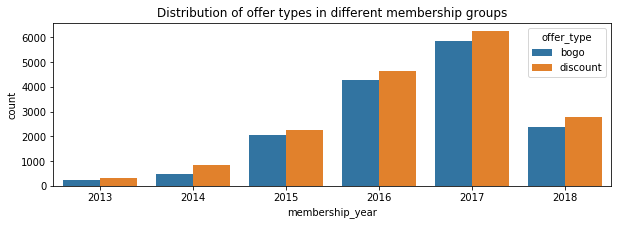

In [64]:
#Set up a figure
fig = plt.figure(figsize=(10,3))
sns.countplot(x="membership_year", hue="offer_type", data=completed_df).set_title("Distribution of offer types in different membership groups")

- All members prefer the discount offer.

#### Summarized plots:

Text(0.5,1,'Distribution of offer types in different membership groups')

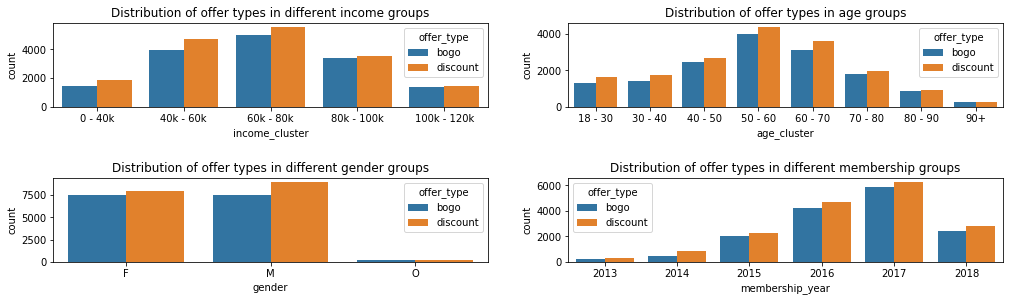

In [65]:
# Summarizing all Plots
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(15,5))
fig.tight_layout(pad=5.0)
sns.countplot(ax=ax1,order=['0 - 40k','40k - 60k','60k - 80k','80k - 100k','100k - 120k'],x="income_cluster", hue="offer_type", data=completed_df).set_title("Distribution of offer types in different income groups")
sns.countplot(ax=ax2,order=sorted(offer_df['age_cluster'].unique()),x="age_cluster", hue="offer_type", data=completed_df).set_title("Distribution of offer types in age groups")
sns.countplot(ax=ax3,x="gender", hue="offer_type", data=completed_df).set_title("Distribution of offer types in different gender groups")
sns.countplot(ax=ax4,x="membership_year", hue="offer_type", data=completed_df).set_title("Distribution of offer types in different membership groups")

## Conclusion

For getting an overall good response for offers I would recommend to give offers to female members older than 50 years, who are longer a part of the starbucks community. The income should be higher than 70,000 USD a year. For the offer type I think it does not matter if it is the bogo or the discount offer but the discount offer is completed slightly better than the bogo offer.

### Resources
- https://stackoverflow.com/questions/5254445/add-string-in-a-certain-position-in-python  
- https://stackoverflow.com/questions/38231591/split-explode-a-column-of-dictionaries-into-separate-columns-with-pandas  
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html  
- https://stackoverflow.com/questions/26660654/how-do-i-print-the-key-value-pairs-of-a-dictionary-in-python/26660785  
- https://www.codegrepper.com/code-examples/python/pandas+split+dictionary+into+columns  
- https://towardsdatascience.com/how-to-extract-key-from-python-dictionary-using-value-2b2f8dd2a995  
- https://stackoverflow.com/questions/48784908/numpy-unique-sort-based-on-counts  
- https://www.dataquest.io/blog/python-datetime-tutorial/  
- https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts  
- https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot  
- https://thispointer.com/python-how-to-use-if-else-elif-in-lambda-functions/  
-  https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python#:~:text=Set%20the%20figsize%20argument%20in,pyplot.&text=subplots(figsize%3DNone)%20with,to%20change%20the%20figure%20size.
- https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8  
- https://knowledge.udacity.com/questions/587418  
- https://www.kite.com/python/answers/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python  
- https://datavizpyr.com/how-to-manually-order-boxplot-in-seaborn/